# Evaluation d'un modèle de régression linéaire


Maintenant que l'on sait comment minimiser la fonction de coût, on peut trouver la droite qui minimise l'erreur quadratique moyenne : on a notre modèle ! 

Maintenant, il s'agit **d'évaluer et d'utiliser** ce modèle dans deux contextes différents : 

- *approche descriptive* : décrire la relation entre X et y
- *approche prédictive* : à partir d'une nouvelle observation X_j, déterminer y_j

In [1]:
%load_ext autoreload
import numpy as np 
import matplotlib.pyplot as plt 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Comment interpréter le modèle ? 

1. Générer les données

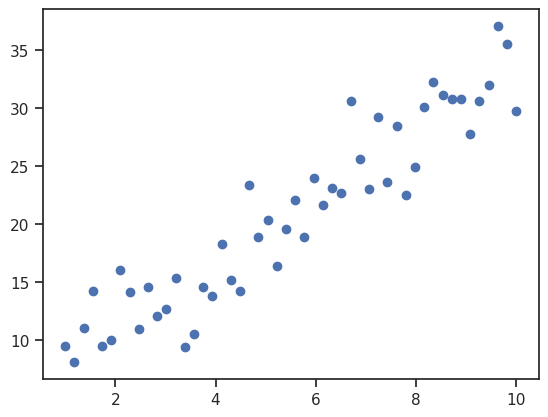

In [16]:
from utils import generate_tree_dataset, gradient_descent, gradient_mse

X, y = generate_tree_dataset(slope=3, intercept=5, add_constant=False)

plt.scatter(X, y);

2. Trouver les meilleurs paramètres

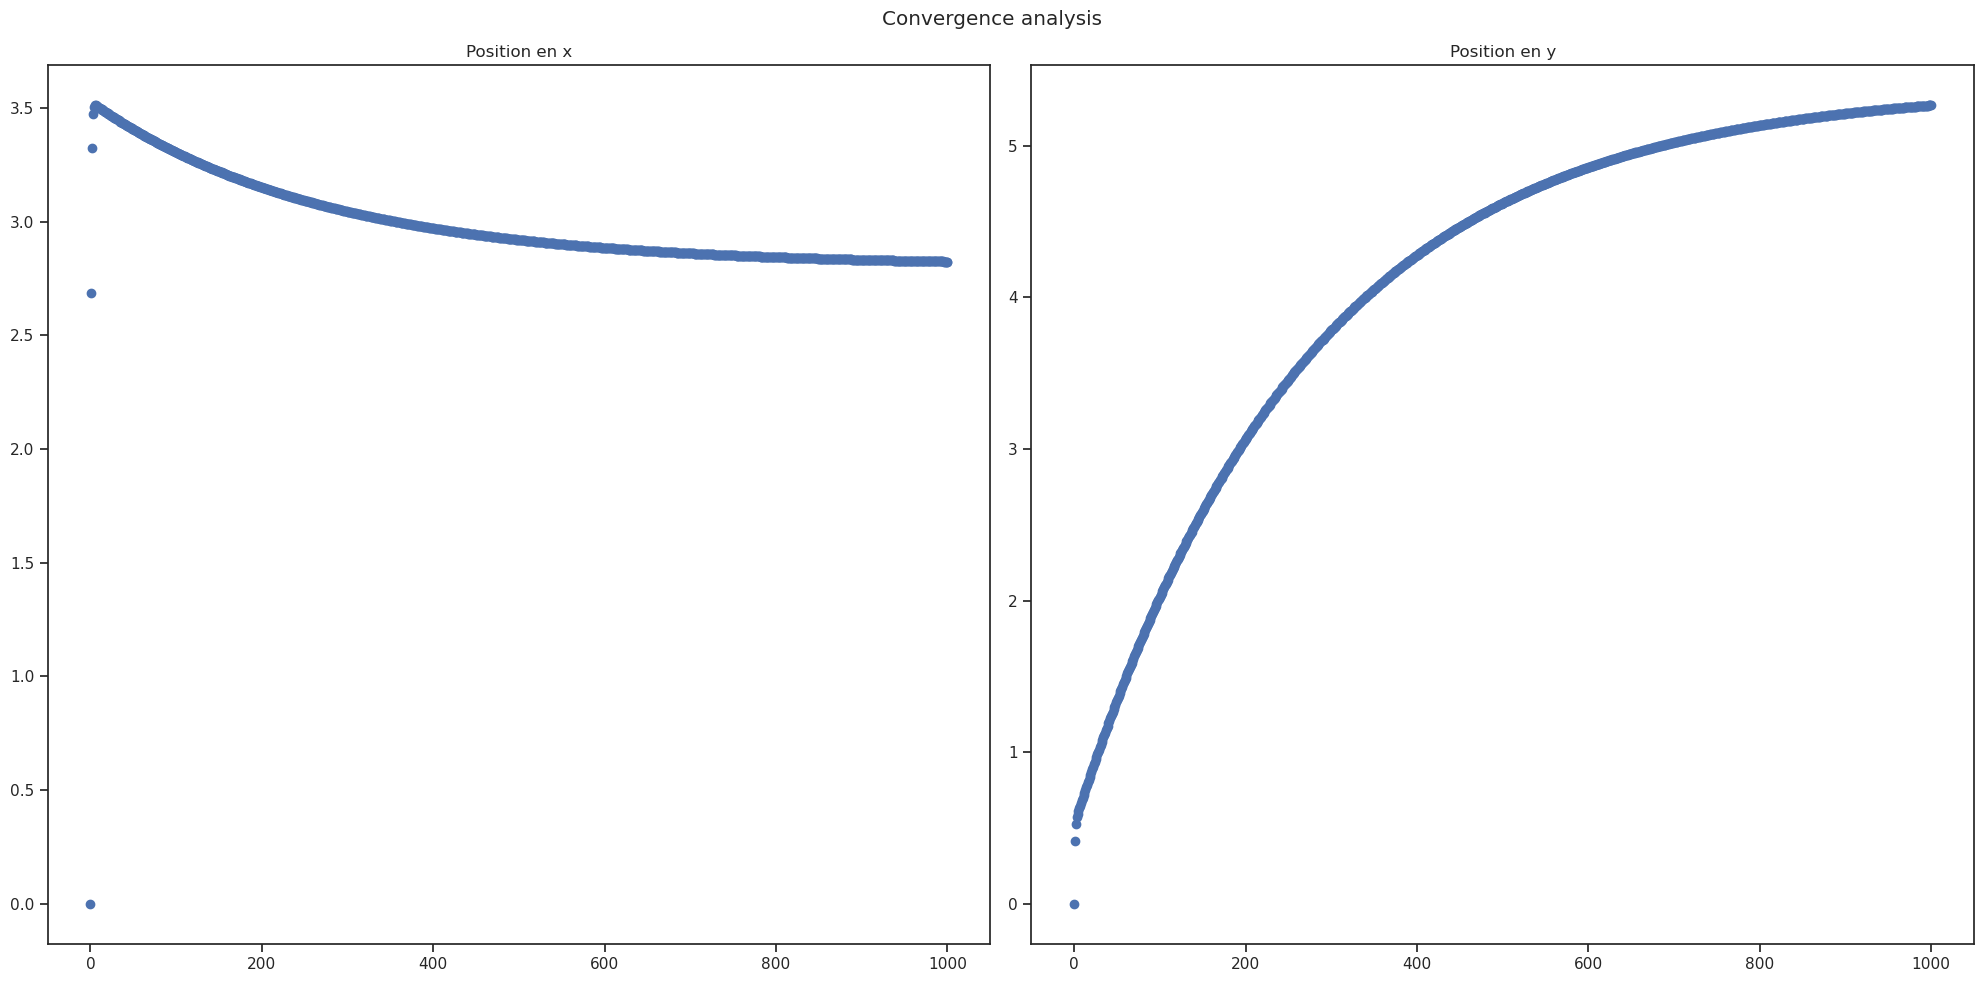

In [41]:
nb_iter = 1_000
lr = 0.01

iteration_hist, _ = gradient_descent(gradient_mse, X, y, n=nb_iter, lr=lr)

a_hist = [i[0] for i in iteration_hist]
b_hist = [i[1] for i in iteration_hist]

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(np.arange(nb_iter+1), a_hist)
axs[0].set_title("Position en x")
axs[1].scatter(np.arange(nb_iter+1), b_hist)
axs[1].set_title("Position en y")

plt.suptitle("Convergence analysis")
plt.tight_layout()
plt.show();


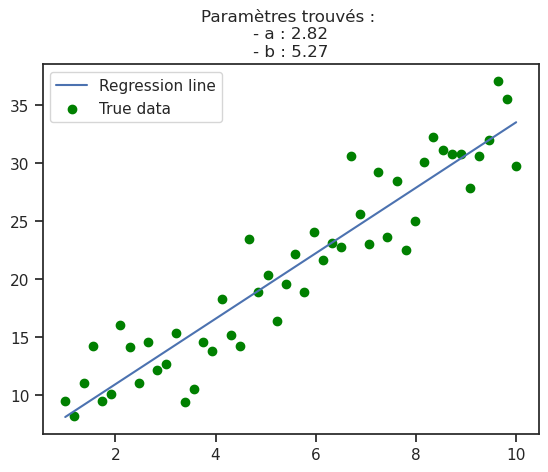

In [ ]:
a_hat, b_hat = a_hist[-1], b_hist[-1]

plt.plot(X, a_hat * X + b_hat, label="Regression line")
plt.scatter(X, y, label="True data", color="green")
plt.title("Paramètres trouvés : \n- a : {:.2f}\n- b : {:.2f}".format(a_hat, b_hat))
plt.legend();

Interprétation des paramètres : 

- ordonnée à l'origine : valeur quand le régresseur vaut 0
- pente : changement en y quand x augmente d'une unité

# Comment mesurer la qualité du modèle ? 


On définit le coefficient de détermination \(R^2\) comme :

$$
R^2 = 1 - \frac{RSS}{TSS} = \frac{ESS}{TSS}
$$

avec :

$$
TSS = \sum_{i=1}^n (y_i - \bar{y})^2 \quad \text{(Total Sum of Squares)},
$$

$$
RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 \quad \text{(Residual Sum of Squares)},
$$

$$
ESS = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 \quad \text{(Explained Sum of Squares)}.
$$

On a la décomposition fondamentale :

$$
TSS = ESS + RSS
$$

Le coefficient de détermination (ou **goodness of fit** mesure la proportion de variance expliquée par le modèle :  
- \(R^2 = 1\) : le modèle explique toute la variance.  
- \(R^2 = 0\) : le modèle n’explique rien de mieux qu’une moyenne constante.  


In [48]:
from ipywidgets import interact 
from sklearn.linear_model import LinearRegression

@interact(noise_std=(0.0, 20.0, 0.1))
def plot_regression(noise_std=1.0):
    # Dataset avec bruit variable
    n_samples = 50
    X, y = generate_tree_dataset(n_samples, noise_std=noise_std)
    y_bar = np.mean(y)

    # Ajustement par régression linéaire
    model = LinearRegression()
    model.fit(X, y)
    y_hat = model.predict(X)

    # Calcul du R²
    tss = np.sum((y - y_bar)**2)
    rss = np.sum((y - y_hat)**2)
    r2 = 1 - rss/tss

    # Plot
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, label="données avec bruit", alpha=0.7)
    plt.plot(X, y_bar * np.ones(n_samples), color="green", label="moyenne")
    plt.plot(X, y_hat, color="red", label="droite ajustée")
    plt.title(f"Régression linéaire avec bruit std={noise_std:.1f}\nR² = {r2:.3f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='noise_std', max=20.0), Output()), _dom_classes=('wid…

De l'importante de visualiser les données : l'exemple du quartet d'Anscombe.



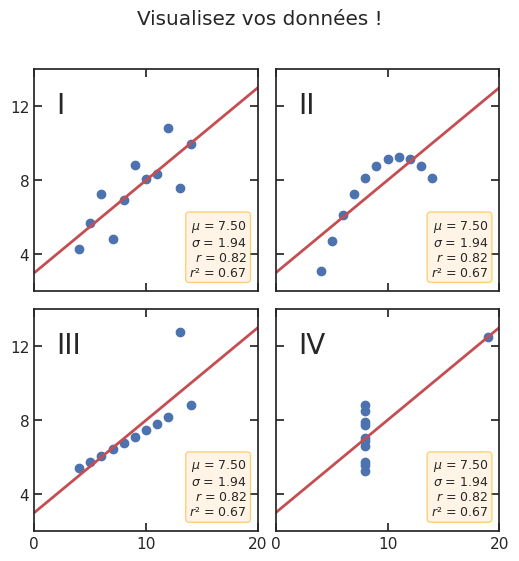

In [50]:

# code from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}\n'
             f'$r²$ = {np.corrcoef(x, y)[0][1]**2 :.2f}'
             )
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.suptitle('Visualisez vos données !')

plt.show()

MSE et RMSE

# Mesurer la capacité prédictive du modèle avec la validation croisée 

# Améliorer la qualité du modèle par l'analyse des résidus